In [2]:
#importing all the required packages.
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [5]:
#loading the dataset
with open('intents.json') as file:
    data = json.load(file)

data

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi', 'Hey', 'Is anyone there?', 'Hello', 'Hay'],
   'responses': ['Hello', 'Hi', 'Hi there']},
  {'tag': 'lockdown',
   'patterns': ['What happens if there is another lockdown in future?',
    'What if there is another lockdown?',
    'lockdown'],
   'responses': ['In the event of a future lockdown, we will follow guidance from the Department for Education and our local public health authorities, and keep you updated on arrangements.']},
  {'tag': 'goodbye',
   'patterns': ['Bye', 'See you later', 'Goodbye'],
   'responses': ['See you later', 'Have a nice day', 'Bye! Come back again']},
  {'tag': 'vaccine',
   'patterns': ['Can I get vaccinated ?',
    'Who can get vaccinated',
    'Is vaccination available for everyone',
    'vaccine',
    'vaccination'],
   'responses': ['anybody aged 16 or over in the UK is eligible for a free COVID-19 vaccination, regardless of their nationality or immigration status. We are strongly encouraging our

In [4]:
#allocating the questions and labels to variables
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [4]:
#appplying the label encoders to the labels
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)


In [5]:
#applying tokenization
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token) # adding out of vocabulary token
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

In [6]:
#creating the sequential model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 11)                187       
                                                                 
Total params: 16,731
Trainable params: 16,731
Non-trainable params: 0
____________________________________________________

In [8]:
#fitting the sequential model on the inputs
epochs = 550
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/550
2/2 [==============================] - 0s 3ms/step - loss: 2.3974 - accuracy: 0.0952
Epoch 2/550
2/2 [==============================] - 0s 3ms/step - loss: 2.3959 - accuracy: 0.1667
Epoch 3/550
2/2 [==============================] - 0s 3ms/step - loss: 2.3949 - accuracy: 0.1667
Epoch 4/550
2/2 [==============================] - 0s 3ms/step - loss: 2.3936 - accuracy: 0.1667
Epoch 5/550
2/2 [==============================] - 0s 2ms/step - loss: 2.3926 - accuracy: 0.1667
Epoch 6/550
2/2 [==============================] - 0s 3ms/step - loss: 2.3917 - accuracy: 0.1667
Epoch 7/550
2/2 [==============================] - 0s 3ms/step - loss: 2.3908 - accuracy: 0.1667
Epoch 8/550
2/2 [==============================] - 0s 3ms/step - loss: 2.3897 - accuracy: 0.1667
Epoch 9/550
2/2 [==============================] - 0s 3ms/step - loss: 2.3889 - accuracy: 0.1667
Epoch 10/550
2/2 [==============================] - 0s 3ms/step - loss: 2.3880 - accuracy: 0.1667
Epoch 11/550
2/2 [===========

In [14]:
loss, acc = model.evaluate(padded_sequences, np.array(training_labels), verbose=0)
print('Test Accuracy: %.3f'% acc)

Test Accuracy: 1.000


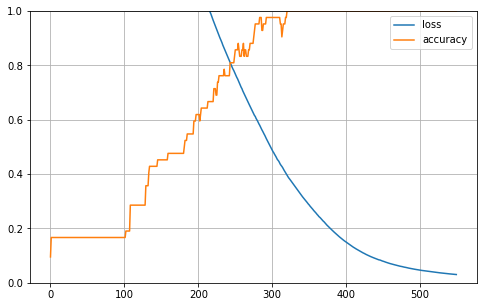

In [9]:
#analyzing the results with the help of the graph
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [10]:
training_labels.shape

(42,)

In [11]:
padded_sequences.shape

(42, 20)

In [12]:



#creating another model by using keras functional api instead of the sequential api.



input_A = tf.keras.layers.Input(shape=(192,), name="wide_input")
input_B = tf.keras.layers.Input(shape=(28,28), name="deep_input")
#connecting the first layer with the input from the features
x=Embedding(vocab_size, embedding_dim, input_length=max_len)
x= tf.keras.layers.Dense(600, activation='relu')(input_A)
x=tf.keras.layers.Dense(100, activation='relu')(x)
x=tf.keras.layers.Dense(28, activation='relu')(x)
x=tf.keras.Model(inputs=input_A, outputs=x)

#connecting the second layer using the input from the images
         
y= tf.keras.layers.Dense(28, activation='relu')(input_B)
y=tf.keras.layers.Dense(7, activation='relu')(y)
y=tf.keras.layers.Dense(28, activation='relu')(y)
y=tf.keras.Model(inputs=input_B, outputs=y)

concat =  tf.keras.layers.concatenate([x.output, tf.keras.layers.Flatten()(y.output)])

output = tf.keras.layers.Dense(1, name="output")(concat)

model2 = tf.keras.Model(inputs=[x.input, y.input], outputs=[output])
model2.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 28, 28)]     0           []                               
                                                                                                  
 wide_input (InputLayer)        [(None, 192)]        0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 28, 28)       812         ['deep_input[0][0]']             
                                                                                                  
 dense_3 (Dense)                (None, 600)          115800      ['wide_input[0][0]']             
                                                                                            

In [13]:
# saving model
model.save("chat_model")

import pickle

# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

# saving label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model/assets
